## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

#### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1.Reading & Understanding Data

In [108]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [110]:
df.head()
# Checking few records of the dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [111]:
df.shape
# getting shape of the dataset

(205, 26)

In [112]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

The Data doesn't seem to have any missing values and data types are interpreted properly

## 2. Data Cleaning

    The Variable 'CarName' is comprised of two parts - the first word is the name of 'car company' and the second is the'car model' of the Variable  
    We can just consider only the name of the car company for better analysis

In [114]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [115]:
df['CarName']=df['CarName'].apply(lambda x: x.split(' ')[0])
# Getting the Company name

In [116]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some cars which are recorded with different names, Let's just replace them with one unique name

In [117]:
df['CarName'] = df['CarName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')
df['CarName'] = df['CarName'].replace(['porcshce'], 'porsche')
df['CarName'] = df['CarName'].replace(['toyouta'], 'toyota')
df['CarName'] = df['CarName'].replace(['Nissan'], 'nissan')
df['CarName'] = df['CarName'].replace(['maxda'], 'mazda')

In [118]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## 3.Visualisation of the Data

Let's see how the price is distributed over the data

<AxesSubplot:xlabel='price', ylabel='Density'>

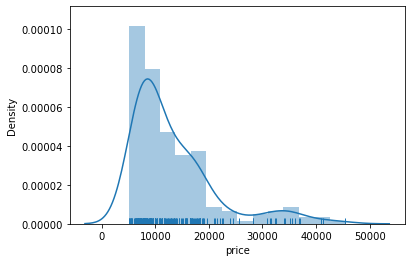

In [119]:
sns.distplot(df['price'],rug=True)

    - Most of the cars in the data are priced in the range of 5000 to 15000
    - There are only few cars with very high price recorded due to which there is significant difference in mean and median
    - 90% of records are aproximately below 22000, only 10% of the data are in the range between 22000 and 45000.

In [120]:
df['price'].describe(percentiles=[0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.98])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
80%      17493.800000
85%      18500.000000
90%      22563.000000
95%      32472.400000
98%      36809.600000
max      45400.000000
Name: price, dtype: float64

### Bivariate Analysis

#### Visualising Numeric Variables

Let's see what all numeric variables are strongly associated with the Target variable 'Price' 

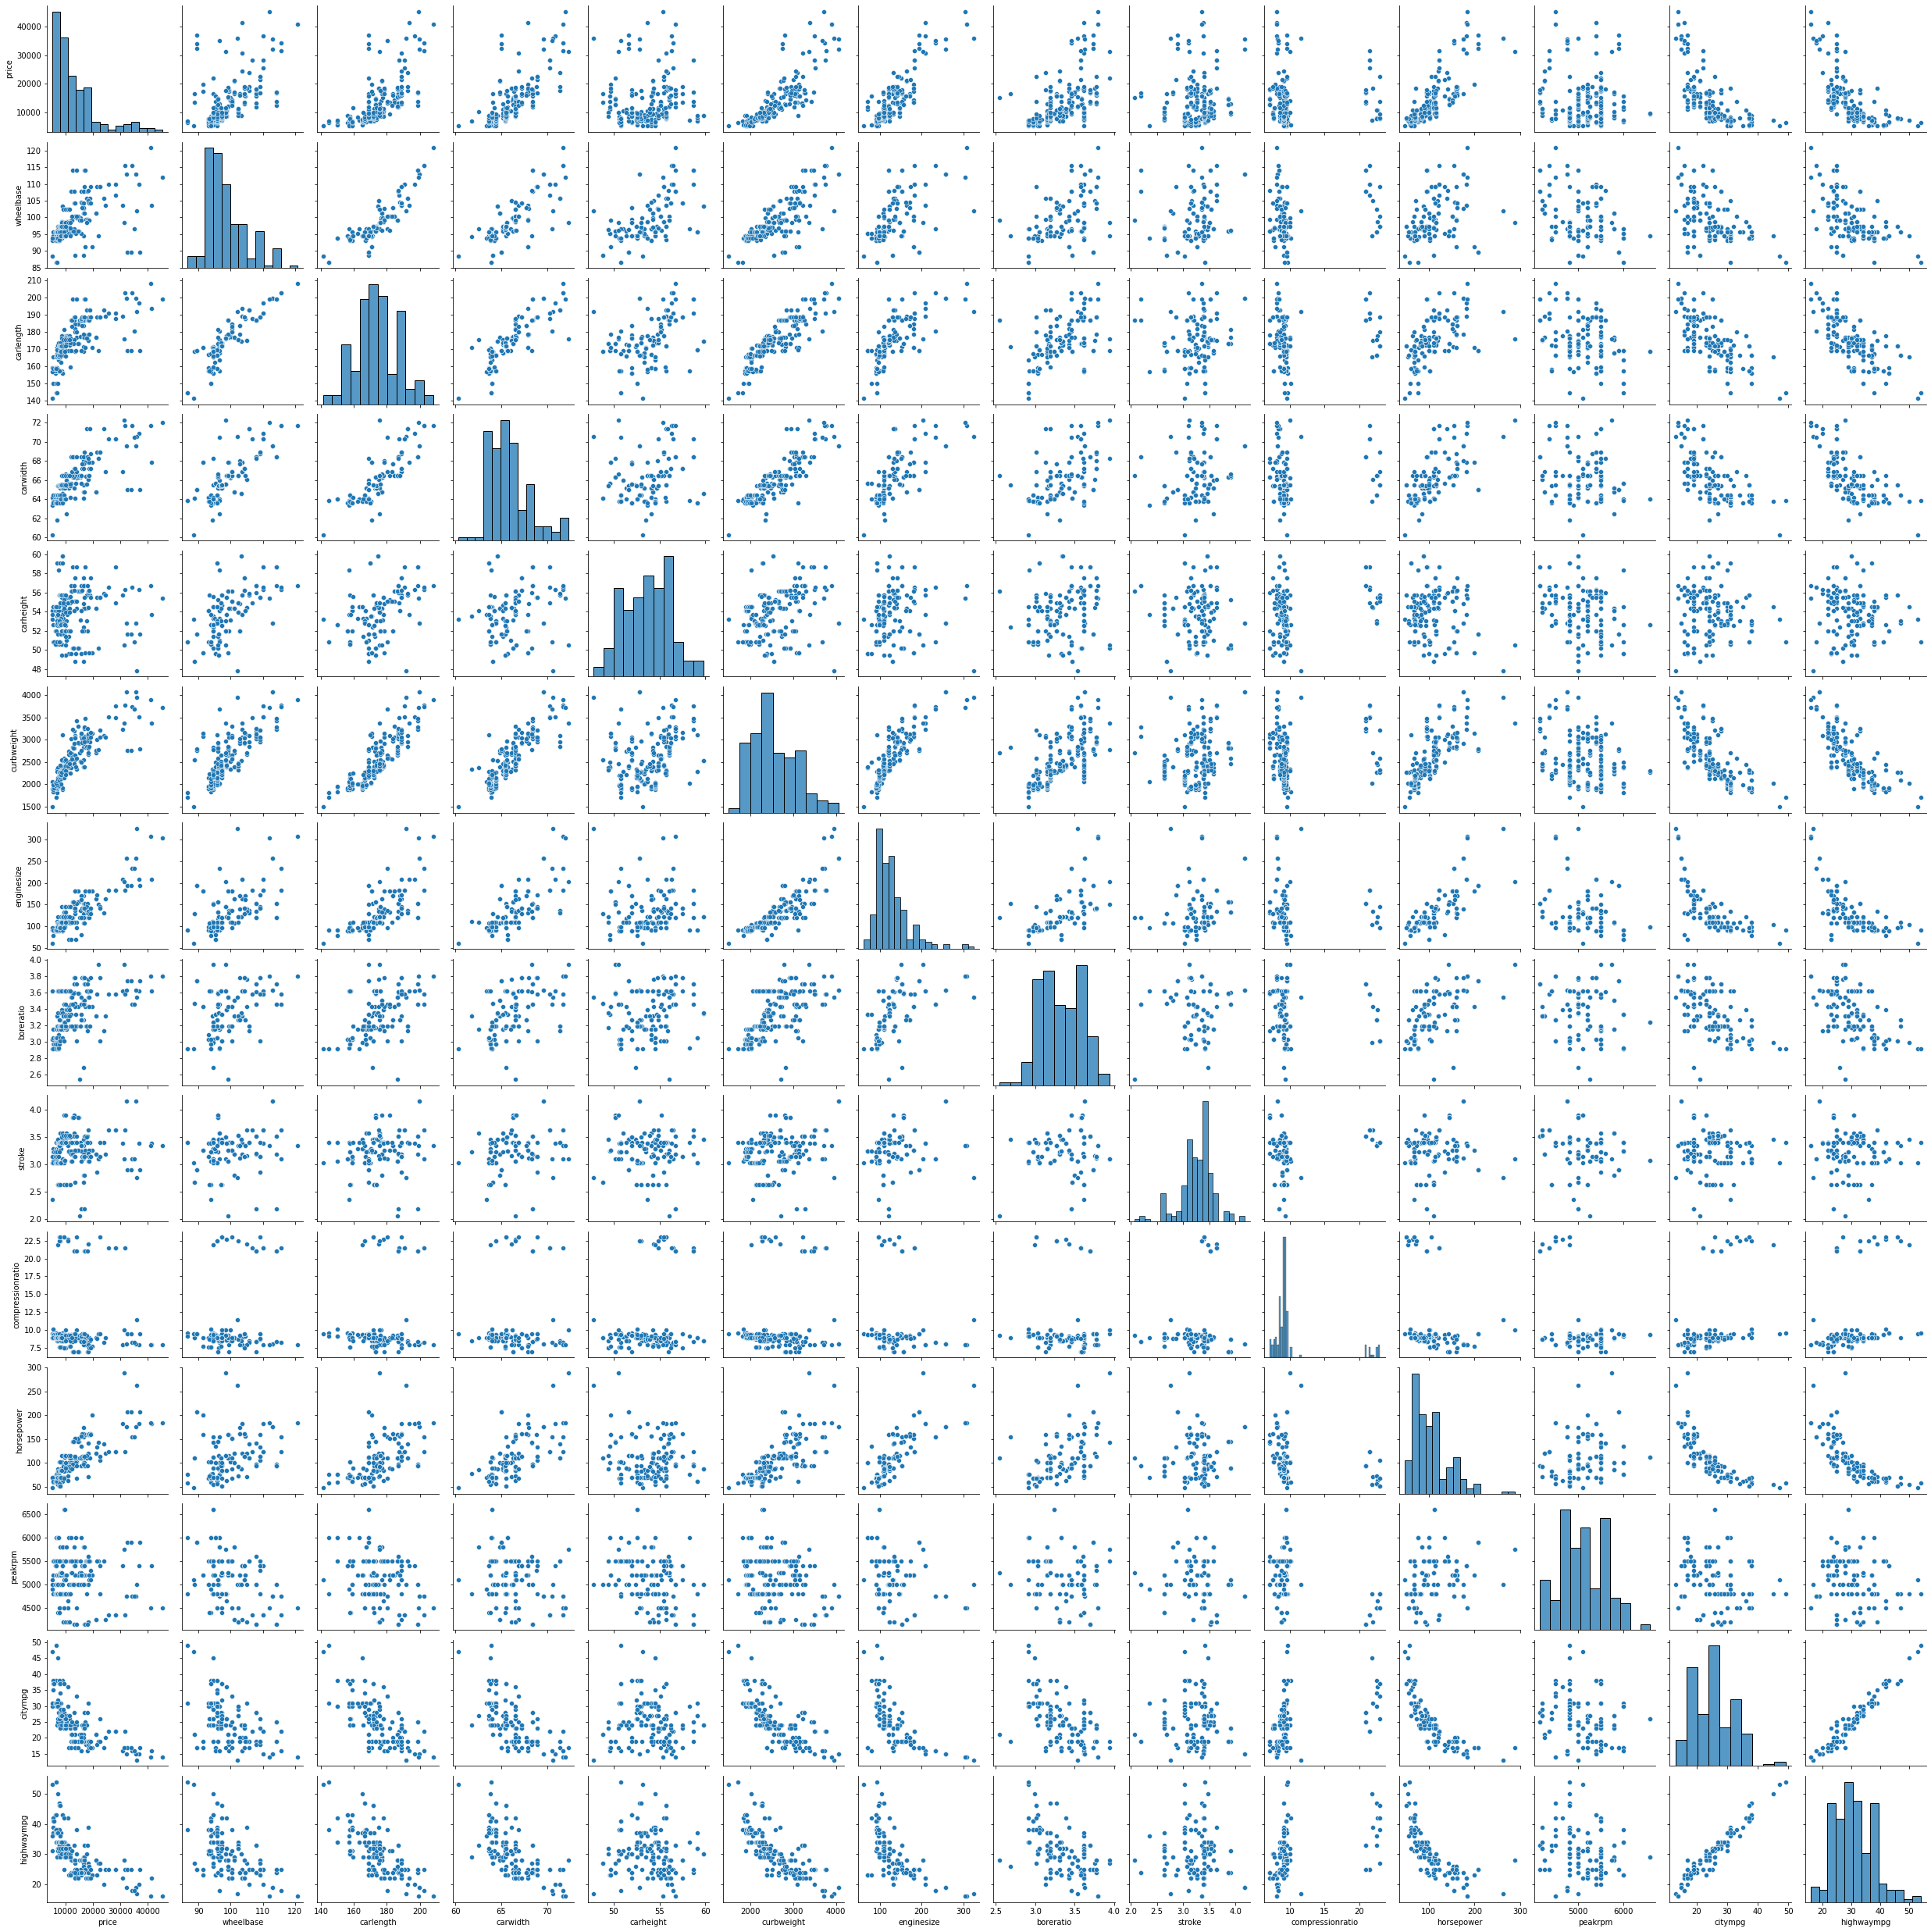

In [121]:
sns.pairplot(df[['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']])

    We can see some variables like wheelbase, carlength, carwidth, curbweight,enginesize,horsepower,citympg,highwaymp showing some significant trends with respect to Price

##### Let's analyse each independent numeric variable with respect to price 

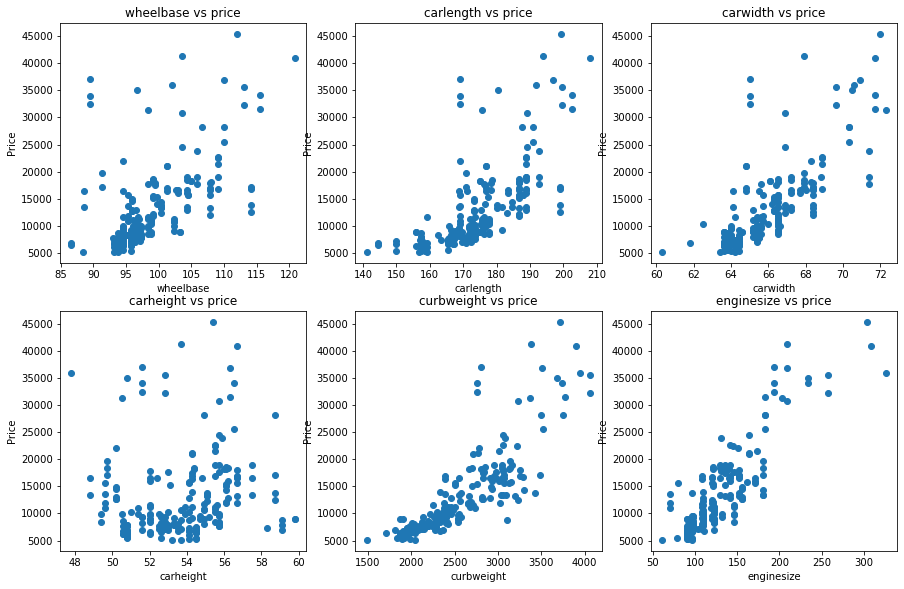

In [122]:
plt.figure(figsize=(15, 15))
def Scatterplot_(x,index):
    plt.subplot(3,3,index)
    plt.scatter(df[x],df['price'])
    plt.title(x +' vs price')
    plt.ylabel('Price')
    plt.xlabel(x)

Scatterplot_('wheelbase',1)
Scatterplot_('carlength',2)
Scatterplot_('carwidth',3)
Scatterplot_('carheight',4)
Scatterplot_('curbweight',5)
Scatterplot_('enginesize',6)



    The Variables Wheelbase, Carlength, Carwidth, Curbweight, Enginesize vary linear relationship with respect to Price
    where as Carheight doesn't show any significant correlation with Price

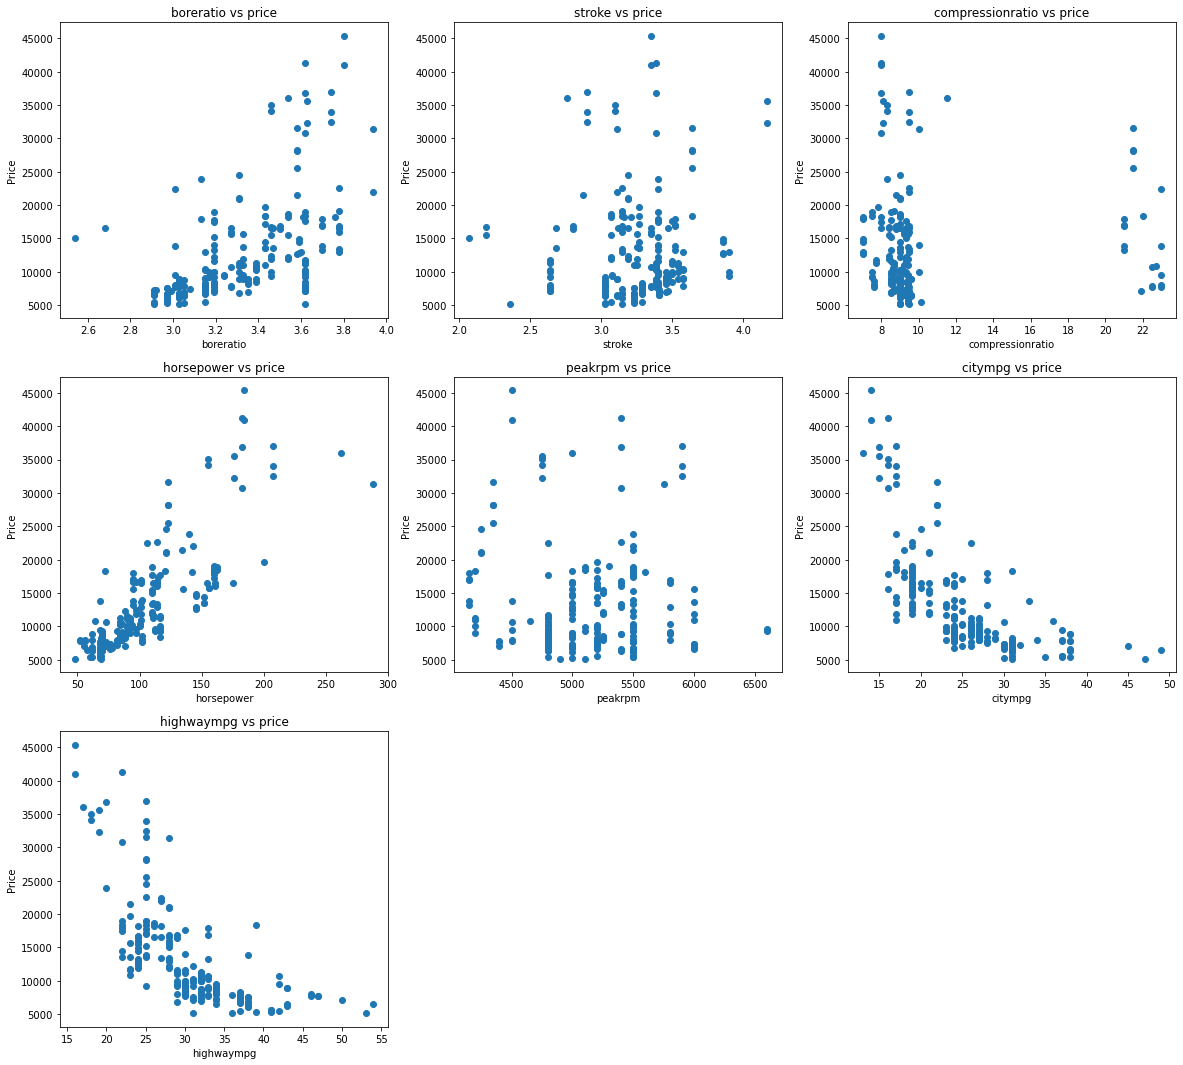

In [123]:
plt.figure(figsize=(20, 25))
def Scatterplot_(x,index):
    plt.subplot(4,3,index)
    plt.scatter(df[x],df['price'])
    plt.title(x +' vs price')
    plt.ylabel('Price')
    plt.xlabel(x)

Scatterplot_('boreratio',1)
Scatterplot_('stroke',2)
Scatterplot_('compressionratio',3)
Scatterplot_('horsepower',4)
Scatterplot_('peakrpm',5)
Scatterplot_('citympg',6)
Scatterplot_('highwaympg',7)


    The Variables Boreratio slight variation with the price where as Horsepower is showing strong linear relationship with Price.
    Conversely Citympg, Highwaympg is showing linear relationship inversely with Price which is expected.
    But the variables Stroke, Compression ratio, peakrpm aren't showing any appreciable trend with price.

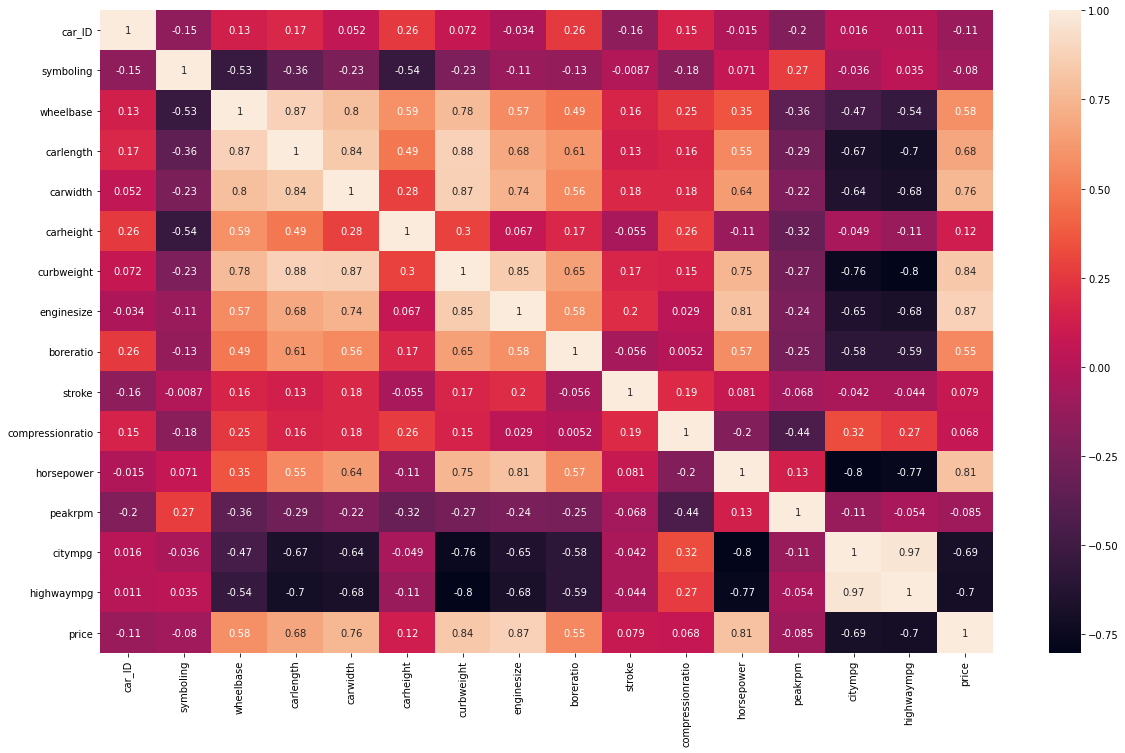

In [124]:
plt.figure(figsize = (20, 26))
plt.subplot(2, 1, 1)
sns.heatmap(df.corr(), annot = True)
plt.show()

From the above correlation plot we can also infer that many independent variables are correlated with each other
 
- Wheelbase is positively correlated with carlength, carwidth,curbweight  
Likewise:  
    - carwidth is positively correlated with wheel base, carlength,curbweight, enginesize  
    - enginesize is positively correlated with carwidth,curbweight,horsepower 
- Citympg and highwaympg are highly correlated with each other and negatively correlated with curbweight and horsepower   


#### Visualising Categorical variables

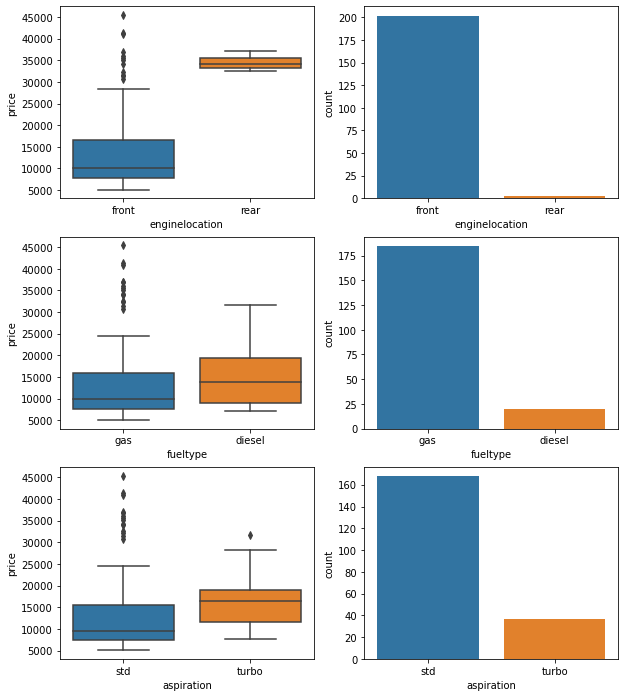

In [125]:
plt.figure(figsize=(10, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'enginelocation', y = 'price',data = df)
plt.subplot(3,2,2)
sns.countplot(x= 'enginelocation', data = df)

plt.subplot(3,2,3)
sns.boxplot(x= 'fueltype', y = 'price', data = df)
plt.subplot(3,2,4)
sns.countplot(x= 'fueltype', data = df)

plt.subplot(3,2,5)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,2,6)
sns.countplot(x= 'aspiration', data = df)

plt.show()

From above plots we could infer that:
- There are no suffice records to draw the inference but with the available information we can say that most expensive Cars have engine in rear location but almost all the cars have engine in the front location
- The diesel cars also recorded slightly higher price comparitively, but again the cars having fuel type  as gas are more chosen
- Similar case with aspiration, Cars with turbo aspiration have high price when compared to Std type.

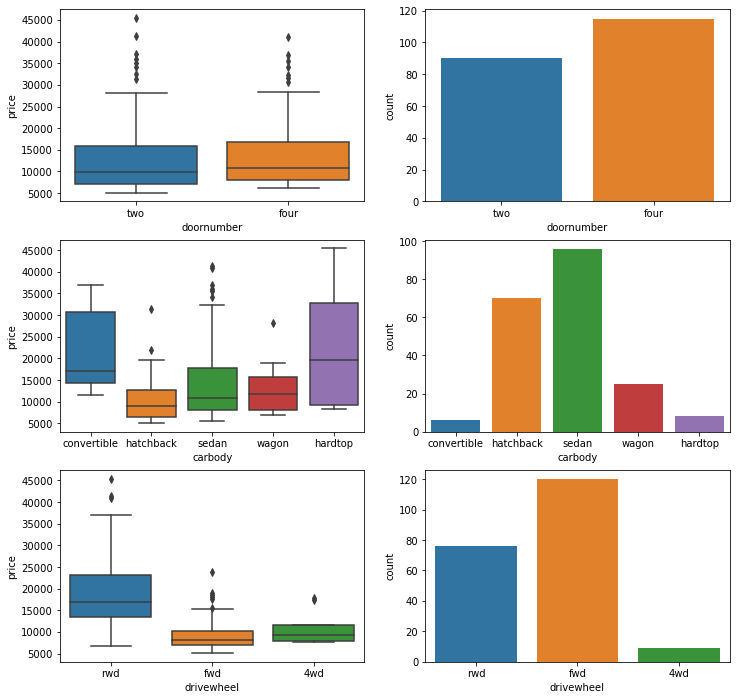

In [126]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.boxplot(x = 'doornumber', y = 'price',data = df)
plt.subplot(3,2,2)
sns.countplot(x = 'doornumber', data = df)

plt.subplot(3,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,2,4)
sns.countplot(x = 'carbody', data = df)

plt.subplot(3,2,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,2,6)
sns.countplot(x = 'drivewheel', data = df)

plt.show()

From above plots we could infer that:
- The Cars having two or four doornumbers doesn't really affect the price of the car
- In general, Sedan Cars are mostly preferred by people and expensive cars seems to have hardtop  and convertible carbody
- Many of the cars has fwd as drivewheel with average price range of 10,000 but cars having rwd drive wheel seems to  have high price





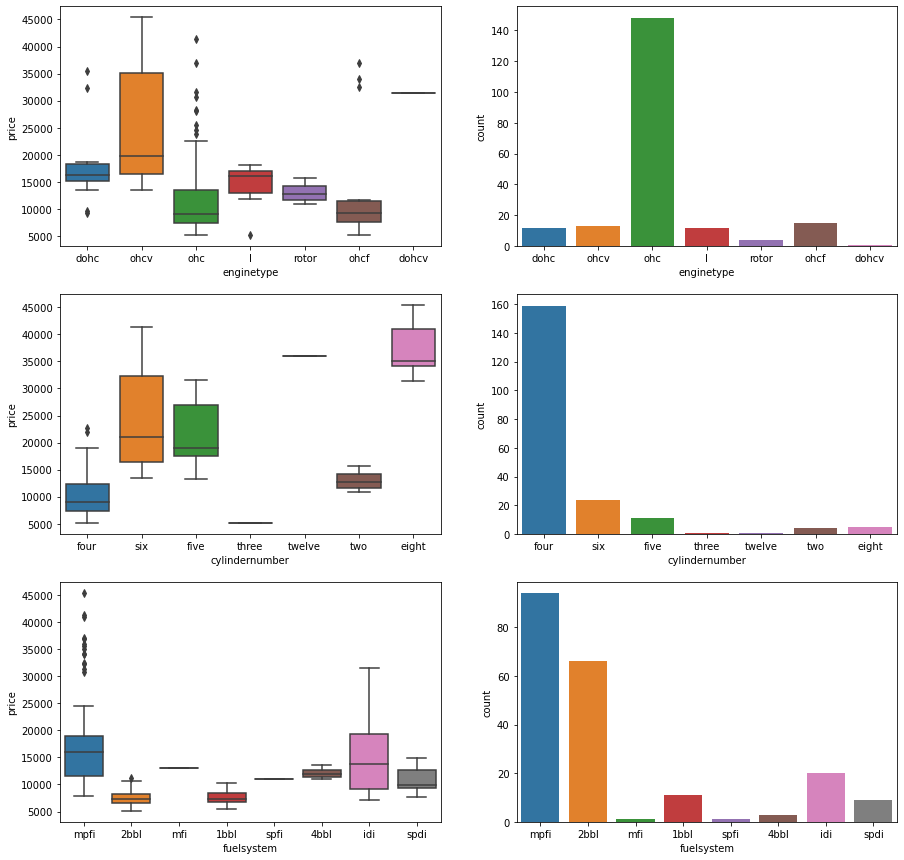

In [127]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x = 'enginetype', y = 'price',data = df)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.subplot(3,2,2)
sns.countplot(x= 'enginetype' ,data = df)

plt.subplot(3,2,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,2,4)
sns.countplot(x = 'cylindernumber',data = df)

plt.subplot(3,2,5)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(3,2,6)
sns.countplot(x = 'fuelsystem',data = df)

plt.show()

From above plots we could infer that:
- OHC Engine type is mostly used in the cars, OHCV being less in number, it's median value is more than any other type which means the cars using OHCV engine type could be really expensive
- Cars with four,six and five cylinders are most commonly used,Likewise the above case the number of cars having eight cylinders is less in number but recorded very high price concluding that those might be used in expensive cars. 
- mpfi,idi,2bbl,1bbl fuel systems seems to be mostly used by the cars






<AxesSubplot:xlabel='symboling', ylabel='count'>

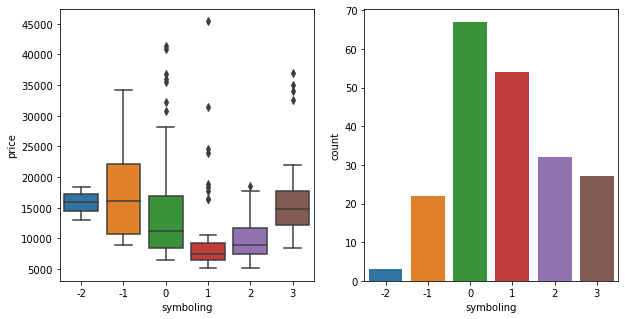

In [128]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'symboling', y = 'price',data = df)
plt.subplot(1,2,2)
sns.countplot(x= 'symboling', data = df)

    Symboling is an assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
    There is also hike in the number of cars having risk rating 0 and 1 with average price less than other ratings
    From plot1 we could see that the average value of price is nearly same for auto being risky(3) and safe(-2)  which  is why we couldn't really conclude that Symboling affects the Price of a car
    


    *Let's analyse the different car companies present in the dataset*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'jaguar'),
  Text(1, 0, 'buick'),
  Text(2, 0, 'porsche'),
  Text(3, 0, 'bmw'),
  Text(4, 0, 'volvo'),
  Text(5, 0, 'audi'),
  Text(6, 0, 'mercury'),
  Text(7, 0, 'alfa-romero'),
  Text(8, 0, 'peugeot'),
  Text(9, 0, 'saab'),
  Text(10, 0, 'mazda'),
  Text(11, 0, 'nissan'),
  Text(12, 0, 'volkswagen'),
  Text(13, 0, 'toyota'),
  Text(14, 0, 'renault'),
  Text(15, 0, 'mitsubishi'),
  Text(16, 0, 'isuzu'),
  Text(17, 0, 'subaru'),
  Text(18, 0, 'honda'),
  Text(19, 0, 'plymouth'),
  Text(20, 0, 'dodge'),
  Text(21, 0, 'chevrolet')])

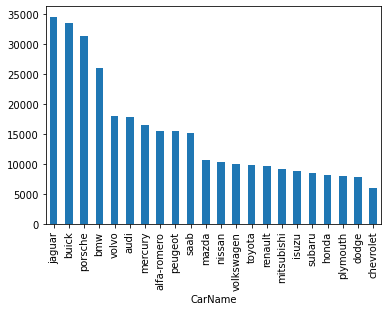

In [129]:
df.groupby('CarName')['price'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)

    There are numerous amount of car brands and can be grouped into different buckets. Here we could divide these cars into different buckets based on their mean value 
    
    From the above plot we can clearly distinguish the cars into three buckets-Highlevel, Midlevel and Lowlevel.  
    Lowlevel- 0 to 10,000  
    Midlevel- 10,000 to 20,000  
    Highlevel- more than 20,000

In [130]:
data=df.groupby('CarName')[['price']].mean()
# getting average price for each car

df_=pd.merge(df,data,on='CarName')
# merging the average price with the data frame based on CarName

In [131]:
df['CarLevel']=pd.cut(df_['price_y'],[0,10000,20000,40000],labels=['Lowlevel','Midlevel','Highlevel'])
# Binning the average values into three different levels

In [132]:
df[['CarName','CarLevel']].drop_duplicates()
# Just seeing how the CarNames are mapped 

,CarName,CarLevel
0,alfa-romero,Midlevel
3,audi,Midlevel
10,bmw,Highlevel
18,chevrolet,Lowlevel
21,dodge,Lowlevel
30,honda,Lowlevel
43,isuzu,Lowlevel
47,jaguar,Highlevel
50,mazda,Midlevel
67,buick,Highlevel


In [133]:
df['CarLevel'].value_counts()

Lowlevel     95
Midlevel     86
Highlevel    24
Name: CarLevel, dtype: int64

In [134]:
df.drop('CarName',axis=1,inplace=True)
# Dropping the Carname Variable as we have the carlevel now

### Multivariate Analysis

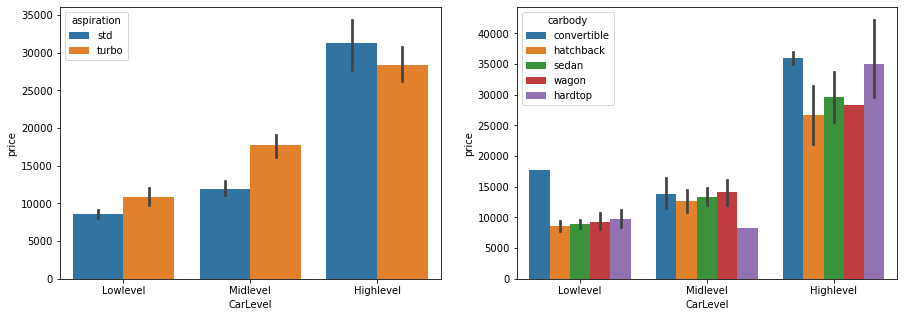

In [135]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(hue = 'aspiration', y = 'price', x='CarLevel',data = df)
plt.subplot(1,2,2)
sns.barplot(hue= 'carbody', y = 'price',x='CarLevel', data = df)

plt.show()

From the above plots:
- The cars with turbo aspiration seems to influence the price of the cars for low and medium bugdetcars but doesn't really affect the price of the cars when the budget is high.
- As said earlier sedan is mostly used, convertible and hardtop have higher price range

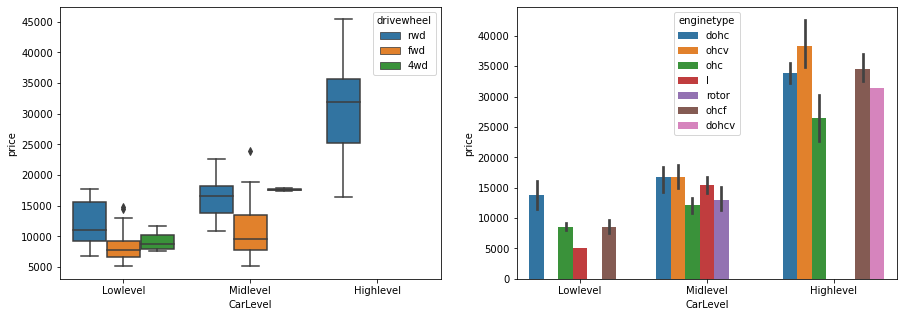

In [136]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(hue = 'drivewheel', y = 'price', x='CarLevel',data = df)
plt.subplot(1,2,2)
sns.barplot(hue= 'enginetype', y = 'price',x='CarLevel', data = df)

plt.show()

- As seen earlier the drivewheel 'rwd' significantly increases the price of the car, The cars with high level budget uses only 'rwd' drivewheel and 'fwd' drivewheel are mostly used in low and medium budget cars
- OHC is the mostly used engine type in the cars, we can also see that the low-cost cars doesn't really use OHCV engine and the cars using OHCV engine is having higher price range than others. 


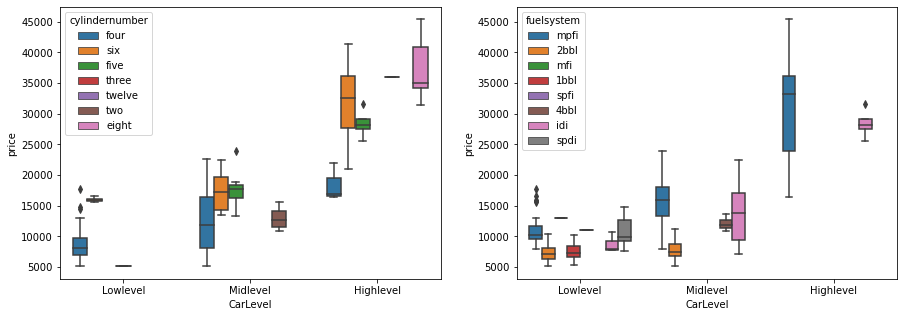

In [137]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(hue = 'cylindernumber', y = 'price', x='CarLevel',data = df)
plt.subplot(1,2,2)
sns.boxplot(hue= 'fuelsystem', y = 'price',x='CarLevel', data = df)

plt.show()


- From the above plot we can say that four,six and five are most commonly used and also the low-cost cars mostly use four cylinders, where as eight cylinders are used  in expensive cars
- mpfi and 2bbl are often used, we can see that the mpfi and idi fuel systems are only used in high budget cars

## 4. Data Preparation

##### From the above exploratory Data analysis we found out that some variables aren't really affecting the price of the car. Henceforth we can include only significant variables which could affect the price of the car  
The Significant Numeric Variables are:  
Wheelbase  
carlength  
carwidth  
curbweight  
enginesize  
boreratio  
horsepower  
citympg  
highwaympg  

The Significant Categorical Variables are:  
CarLevel  
fueltype  
aspiration  
carbody  
drivewheel  
cylindernumber  
enginetype  
fuelsystem  


In [138]:
df2=df[['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','CarLevel','fueltype','aspiration', 'carbody','drivewheel','cylindernumber','enginetype','fuelsystem']]

In [139]:
df2.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,CarLevel,fueltype,aspiration,carbody,drivewheel,cylindernumber,enginetype,fuelsystem
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,Midlevel,gas,std,convertible,rwd,four,dohc,mpfi
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,Midlevel,gas,std,convertible,rwd,four,dohc,mpfi
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,Midlevel,gas,std,hatchback,rwd,six,ohcv,mpfi
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,Midlevel,gas,std,sedan,fwd,four,ohc,mpfi
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,Midlevel,gas,std,sedan,4wd,five,ohc,mpfi


### Creating Dummy variables

In [140]:
df2['fueltype']=df2['fueltype'].apply(lambda x: 1 if x=='gas' else 0)
df2['aspiration']=df2['aspiration'].apply(lambda x: 1 if x=='std' else 0)
# fueltype and aspiration consits only two level categorical data

In [141]:
category_list=['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'CarLevel','fuelsystem']
for col in category_list:
    status = pd.get_dummies(df2[col])
    df2 = pd.concat([df2, status], axis = 1)
    df2.drop([col], axis = 1, inplace = True)
# creating dummy variables for categorical variables

In [142]:
df2.drop(['convertible','4wd','dohc','eight','Lowlevel','1bbl'],axis=1,inplace=True)
# removing some variables to get k-1 variables from k categories for each variable

In [143]:
df2.columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'fueltype', 'aspiration', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'Midlevel', 'Highlevel',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

## 5. Splitting the Data into Training and Testing Sets


In [208]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
# the the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [209]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
scaler = MinMaxScaler()

In [211]:
# Scaling all the numerical variables except dummy variables
num_vars = ['price','carlength','carwidth','wheelbase','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [212]:
df_train.describe()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,two,Midlevel,Highlevel,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.219310,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.344211,0.374976,...,0.027972,0.412587,0.118881,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.215682,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.186165,0.188477,...,0.165472,0.494030,0.324786,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.067298,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.166667,0.216216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.140343,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.333333,0.378378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.313479,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.500000,0.527027,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [213]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('price')
X_train = df_train

## 6.Building a linear model

In [214]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [215]:
# Running RFE with the output number of the variable equal to 15 from available 38 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [216]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 10),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('citympg', False, 12),
 ('highwaympg', True, 1),
 ('fueltype', False, 16),
 ('aspiration', False, 18),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 11),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 22),
 ('ohc', False, 2),
 ('ohcf', False, 3),
 ('ohcv', False, 4),
 ('rotor', False, 21),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 9),
 ('twelve', True, 1),
 ('two', False, 19),
 ('Midlevel', False, 7),
 ('Highlevel', True, 1),
 ('2bbl', False, 20),
 ('4bbl', False, 17),
 ('idi', False, 13),
 ('mfi', False, 23),
 ('mpfi', False, 14),
 ('spdi', False, 8),
 ('spfi', False, 24)]

In [217]:
col = X_train.columns[rfe.support_]
col
# Top 15 important variables

Index(['wheelbase', 'carwidth', 'curbweight', 'horsepower', 'highwaympg',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'five', 'four',
       'six', 'twelve', 'Highlevel'],
      dtype='object')

In [218]:
X_train.columns[~rfe.support_]

Index(['carlength', 'enginesize', 'boreratio', 'citympg', 'fueltype',
       'aspiration', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'three', 'two', 'Midlevel', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model 1

In [53]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           3.03e-68
Time:                        05:14:05   Log-Likelihood:                 213.84
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     127   BIC:                            -348.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.050      0.201      0.8

###### The variable `five` seems to be insignificant as it's p-value more than the significant value : 0.05. Hence dropping the variable.
#### Model 2

In [49]:
X_train_new = X_train_rfe.drop(["five"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     132.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.18e-69
Time:                        11:10:22   Log-Likelihood:                 212.85
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     128   BIC:                            -351.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.119e-06      0.050   4.25e-05      1.0

###### Now, The variable `six` became insignificant with p-value more than 0.05. Hence dropping the variable.
#### Model 3

In [50]:
X_train_new = X_train_rfe.drop(["five","six"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     143.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.99e-70
Time:                        11:10:22   Log-Likelihood:                 212.49
No. Observations:                 143   AIC:                            -397.0
Df Residuals:                     129   BIC:                            -355.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.050      0.032      0.9

###### Likewise, The variable `twelve` needs to be dropped due to it's insignificance
#### Model 3

In [51]:
X_train_new = X_train_rfe.drop(["five","six","twelve"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     154.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.16e-70
Time:                        11:10:22   Log-Likelihood:                 211.66
No. Observations:                 143   AIC:                            -397.3
Df Residuals:                     130   BIC:                            -358.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0169      0.048      0.350      0.7

###### Similar case with the variable `Wheelbase`,  Thus we have to drop this variable
#### Model 4

In [52]:
X_train_new = X_train_rfe.drop(["five","six","twelve","wheelbase"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     166.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.32e-71
Time:                        11:10:22   Log-Likelihood:                 210.58
No. Observations:                 143   AIC:                            -397.2
Df Residuals:                     131   BIC:                            -361.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.047      0.046      0.9

###### Dropping `hardtop` as it has highest p-value  which is more than significance level:0.05
#### Model 5

In [53]:
X_train_new = X_train_rfe.drop(["five","six","twelve","wheelbase","hardtop"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     183.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.83e-72
Time:                        11:10:22   Log-Likelihood:                 210.00
No. Observations:                 143   AIC:                            -398.0
Df Residuals:                     132   BIC:                            -365.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0133      0.045     -0.297      0.7

###### Now, The variable `highwaympg`  became insignificant after removing some insignificant variables in previous steps. 
#### Model 6

In [54]:
X_train_new = X_train_rfe.drop(["five","six","twelve","wheelbase","hardtop","highwaympg"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           8.26e-73
Time:                        11:10:23   Log-Likelihood:                 208.42
No. Observations:                 143   AIC:                            -396.8
Df Residuals:                     133   BIC:                            -367.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0387      0.033      1.164      0.2

##### `There are no insignificant variables remaining, Let's now find the VIF factor to check the presence of multicollinearity` 

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" ")
print(vif)

 
      Features     VIF
0        const  109.04
8        sedan   13.87
3   curbweight   12.63
7    hatchback   11.79
4   horsepower   10.94
2     carwidth    7.93
1    wheelbase    7.21
9        wagon    6.61
12        four    5.08
13         six    4.61
5   highwaympg    4.44
11        five    2.43
10       dohcv    2.28
6      hardtop    2.05
15   Highlevel    1.81
14      twelve    1.68


###### The variable `curbweight`  should be dropped due to the high VIF value which can lead to multicollinearity.
#### Model 7

In [56]:
X_train_new = X_train_rfe.drop(["five","six","twelve","wheelbase","hardtop","highwaympg","curbweight"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

# checking VIF values
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" ")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.86e-71
Time:                        11:10:23   Log-Likelihood:                 201.12
No. Observations:                 143   AIC:                            -384.2
Df Residuals:                     134   BIC:                            -357.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0409      0.035      1.174      0.2

###### Now, All the variables are significant but the variable `Sedan`  has VIF value more than 5. thus we can drop this variable
#### Model 8

In [57]:
X_train_new = X_train_rfe.drop(["five","six","twelve","wheelbase","hardtop","highwaympg","curbweight","sedan"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()  

print(lm.summary())

# checking VIF values
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" ")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.15e-70
Time:                        11:10:23   Log-Likelihood:                 195.67
No. Observations:                 143   AIC:                            -375.3
Df Residuals:                     135   BIC:                            -351.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.028     -1.153      0.2

###### Consequently,after removing the variable `sedan` , the variable `wagon`  became insignificant, hence dropping ''wagon" variable
### Final Model 1

In [56]:
X_train_new1 = X_train_rfe.drop(["five","six","twelve","wheelbase","hardtop","highwaympg","curbweight","sedan","wagon"], axis = 1)

X_train_lm1 = sm.add_constant(X_train_new1)

lm1 = sm.OLS(y_train,X_train_lm1).fit()  

print(lm1.summary())

# checking VIF values
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(" ")
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     251.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           4.76e-71
Time:                        05:14:56   Log-Likelihood:                 195.22
No. Observations:                 143   AIC:                            -376.4
Df Residuals:                     136   BIC:                            -355.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0344      0.028     -1.249      0.2

##### Now the final model has all the variables with VIF and p-value in acceptable range with R squared :0.917 and Adjusted R-squared value : 0.914.
`Let's go ahead and make residual analysis then predicitons using this model`

### 7.Residual Analysis of the train data

In [59]:
y_train_price = lm1.predict(X_train_lm1)
# predicting y_train using the final model

Text(0.5, 0, 'Errors')

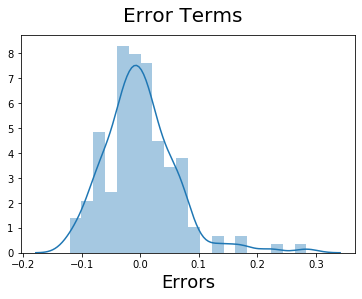

In [60]:
# plotting the distribution plot of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 


##### It's patently clear that the error terms are forllowing the Normal Distribution with mean =0 which satisfies one of the major assumptions made on the linear regression

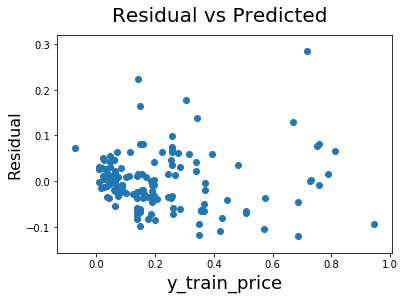

In [61]:
# let's plot the scatter plot of error terms and y_predicted to find if there is any presence of pattern
fig = plt.figure()
plt.scatter(y_train_price,y_train - y_train_price)
fig.suptitle('Residual vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('y_train_price', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)  
plt.show()

##### We can see that the error terms are distributed around zero, and there are no remarkable patterns in the graph. So, we can conclude that the error terms are independent of each other

## 8.Predictions and Evaluation

In [94]:
# applying scaling on the test data set 
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [95]:
y_test = df_test.pop('price')
X_test = df_test

In [64]:
# Now let's use our Final Model 1 to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new1 = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new1)

In [65]:
y_pred = lm1.predict(X_test_new1)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
r_squared=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004962188217535873
r_square_value : 0.907158987982153


    R-squared value for the test data set is 0.907 which is quite good for this model with 0.005 mean squared error

Text(0, 0.5, 'y_pred')

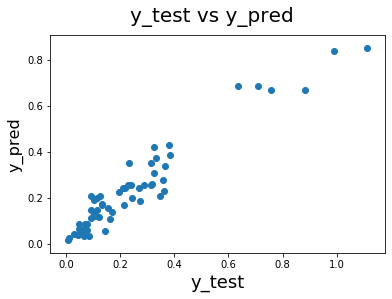

In [67]:
# Let's now plot the graph for actual versus predicted values.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

We can see that the equation of our best fitted line is:

$ price =- 0.0344  \times const + 0.3787  \times  carwidth + 0.4342  \times  horsepower - 0.0374 \times hatchback - 0.2833 \times dohcv - 0.0498 \times four + 0.2683 \times Highlevel $


The model included variables like carwidth, horsepower , carbody type - hatchback, enginetype-dohcv, cylinder numbers-four and high budget cars- BMW, Porsche, buick, Jaguar 

Text(0, 0.5, 'Price')

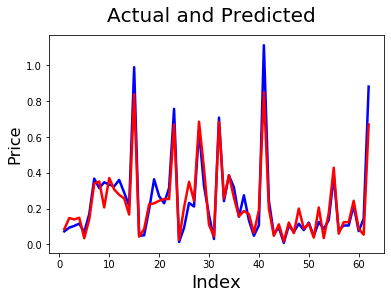

In [68]:
#visualising Actual vs Predicted 
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)  

    We can see that the predicted price and actual price are inline with each other with small difference between them

Text(0, 0.5, 'Price-Predicted_Price')

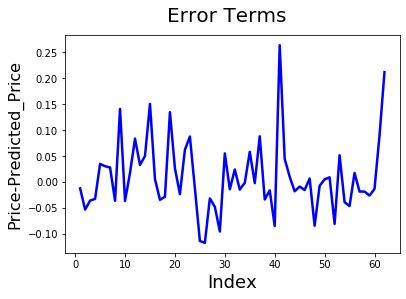

In [69]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Price-Predicted_Price', fontsize=16)    

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.907158987982153

###### Results;
- Having 0.917 of R-Squared and 0.914 of Adjusted R-Squared value for the training data shows that 91% variance is explained by the model
- F- Statistic : 251.6 and Prob(F_statistic) : 4.76e-71 says that overall model is fit not by chance and with all the significant variables as all the p-values are below 0.05 for each independent variable
- R-squared value for the test data set is 0.907



### Appendix

In [219]:
from sklearn.linear_model import LinearRegression 

In [220]:
regr = LinearRegression()

In [221]:
X_train_rfe = X_train[col]
X_train_new1 = X_train_rfe.drop(["five","six","twelve","wheelbase","hardtop","highwaympg","curbweight","sedan","wagon"], axis = 1)


In [222]:
X_train_new1.columns

Index(['carwidth', 'horsepower', 'hatchback', 'dohcv', 'four', 'Highlevel'], dtype='object')

In [223]:
regr.fit(X_train_new1, y_train)

LinearRegression()

In [224]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('price')
X_test = df_test
X_test_new1 = X_test[X_train_new1.columns]

In [225]:
X_test_new1

,carwidth,horsepower,hatchback,dohcv,four,Highlevel
160,0.341667,0.091667,0,0,1,0
186,0.433333,0.154167,0,0,1,0
59,0.516667,0.150000,1,0,1,0
165,0.308333,0.266667,0,0,1,0
140,0.291667,0.104167,1,0,1,0
...,...,...,...,...,...,...
28,0.358333,0.166667,0,0,1,0
29,0.500000,0.404167,1,0,1,0
182,0.433333,0.016667,0,0,1,0
40,0.183333,0.158333,0,0,1,0


In [226]:
print(regr.score(X_test_new1, y_test)) 

0.9071589879821531


In [238]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regr, file)

In [236]:
round(regr.predict(X_test_new1)[0],3)


0.085

In [107]:
regr

LinearRegression()

In [231]:
b=df['price'].max()
a=df['price'].min()

In [233]:
regr.predict(X_test_new1)[0]*(b-a)+a

8541.66142610358

In [235]:
df['price'].min()

5118.0